<a href="https://colab.research.google.com/github/nathalylorena/Data-mining/blob/main/DATAMINING_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280/OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

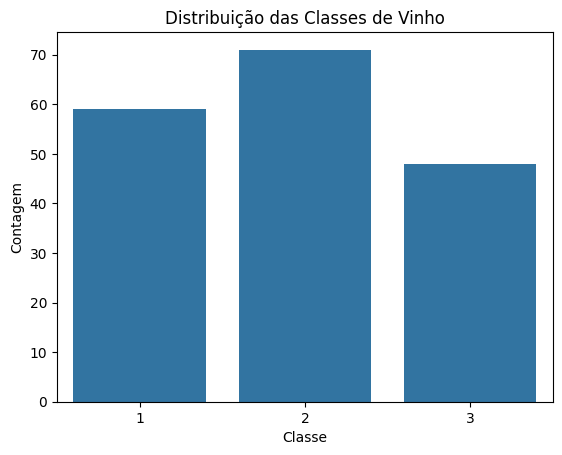

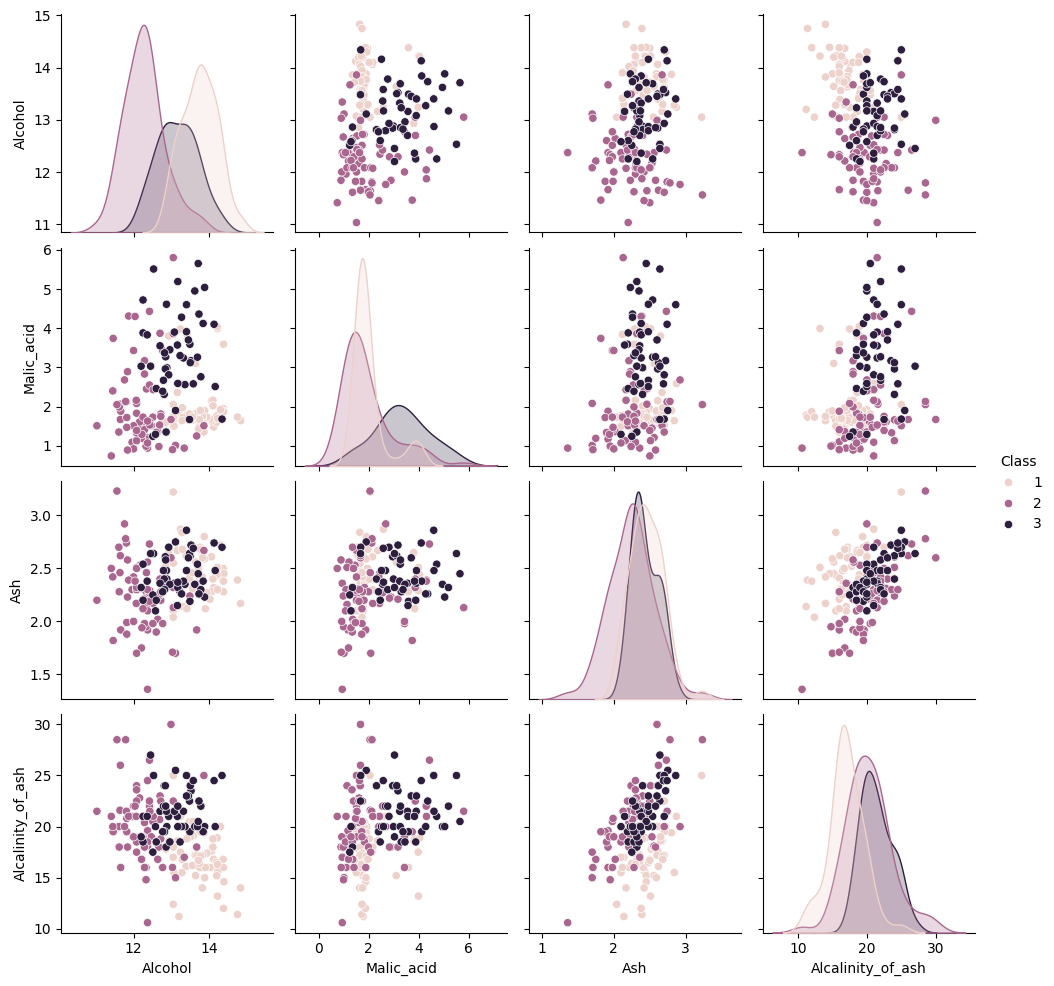

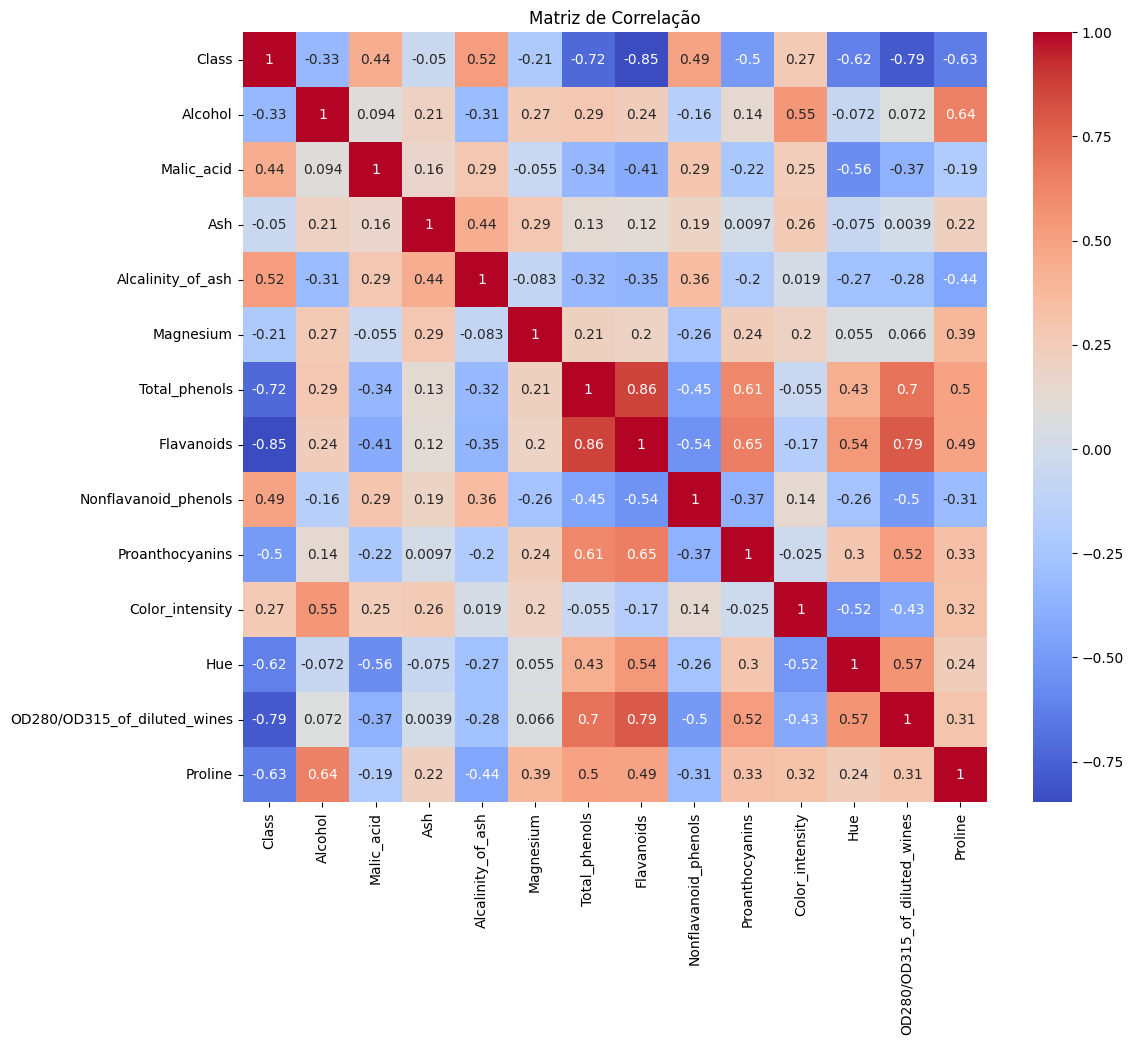

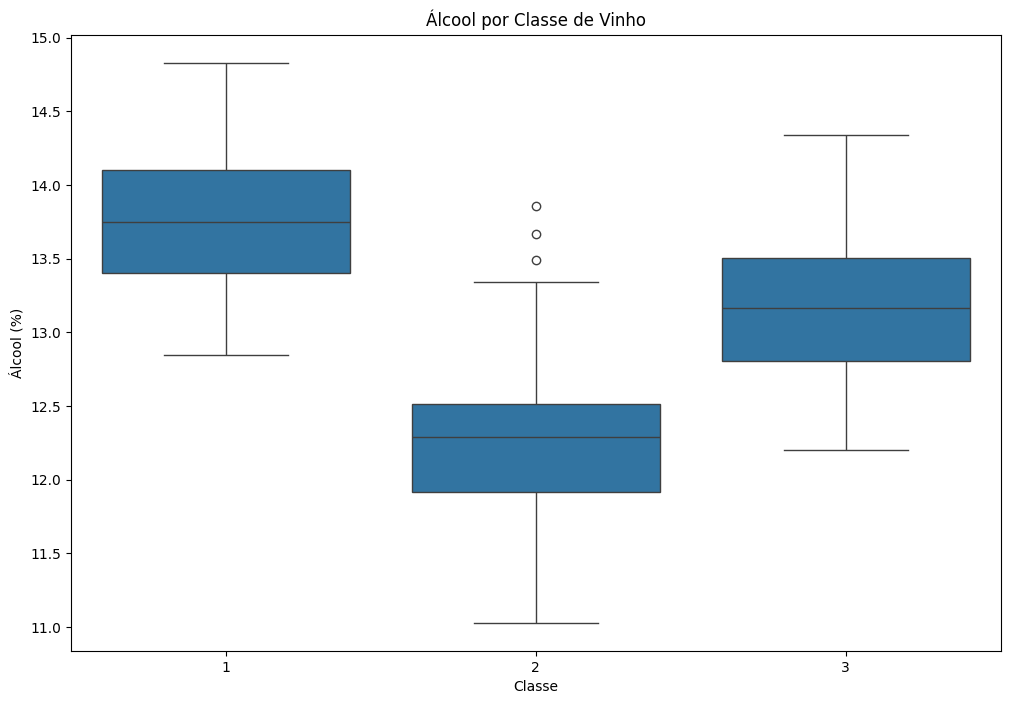

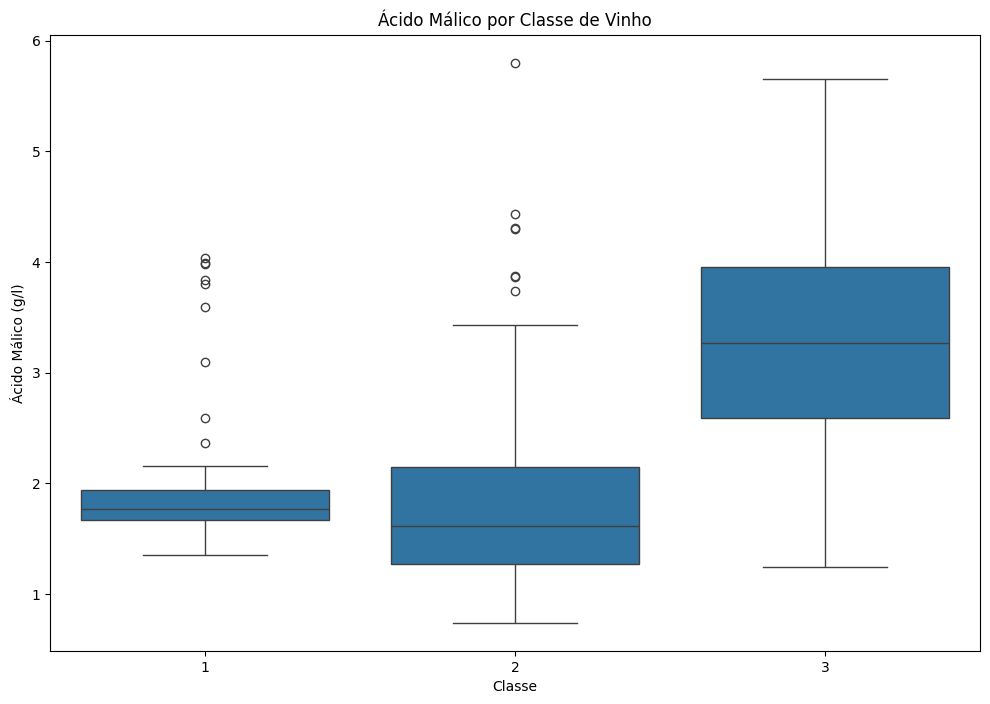

Acurácia: 0.9722222222222222
Matriz de Confusão:
[[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]
Relatório de Classificação:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importando o conjunto de dados Wine
url_wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
colunas = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
           'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
           'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']
df_wine = pd.read_csv(url_wine, header=None, names=colunas)

# Exibindo as primeiras linhas do conjunto de dados
print(df_wine.head())

# Informações básicas sobre o conjunto de dados
print(df_wine.info())

# Estatísticas descritivas
print(df_wine.describe())

# Visualização da distribuição das classes
sns.countplot(x='Class', data=df_wine)
plt.title('Distribuição das Classes de Vinho')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

# Pairplot para visualizar relações entre algumas características
sns.pairplot(df_wine, hue='Class', vars=['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash'])
plt.show()

# Heatmap da matriz de correlação
corr_matrix = df_wine.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Boxplot para visualizar a distribuição das características por classe
plt.figure(figsize=(12, 8))
sns.boxplot(x='Class', y='Alcohol', data=df_wine)
plt.title('Álcool por Classe de Vinho')
plt.xlabel('Classe')
plt.ylabel('Álcool (%)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Class', y='Malic_acid', data=df_wine)
plt.title('Ácido Málico por Classe de Vinho')
plt.xlabel('Classe')
plt.ylabel('Ácido Málico (g/l)')
plt.show()

# Seleção de variáveis independentes (X) e dependente (y)
X = df_wine.drop('Class', axis=1)
y = df_wine['Class']

# Divisão dos dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo de regressão logística
modelo = LogisticRegression(max_iter=200)
modelo.fit(X_treino, y_treino)

# Previsões no conjunto de teste
y_pred = modelo.predict(X_teste)

# Avaliação do modelo
acuracia = accuracy_score(y_teste, y_pred)
print(f'Acurácia: {acuracia}')

# Matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
print('Matriz de Confusão:')
print(matriz_confusao)

# Relatório de classificação
relatorio_classificacao = classification_report(y_teste, y_pred)
print('Relatório de Classificação:')
print(relatorio_classificacao)